In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import re
import sys
import os
sys.path.append(os.path.abspath("../"))

# Load Dataset

In [68]:
# 📄 Setup Display
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

In [69]:
# 📥 Load Dataset
df = pd.read_csv("../data/games_selected.csv")

C:\Users\Yuurei\AppData\Local\Temp\ipykernel_23220\4199674303.py:2: DtypeWarning: Columns (0,4,5,6,7,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/games_selected.csv")


In [70]:
df

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Average playtime forever,Median playtime forever,Developers,Publishers,Categories,Genres,Tags
0,20200,Galactic Bowling,21-Oct-08,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,True,False,False,0,0,6,11,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,655370,Train Bandit,12-Oct-17,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,True,True,False,0,0,53,5,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,1732930,Jolt Project,17-Nov-21,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,True,False,False,0,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN
3,1355720,Henosis™,23-Jul-20,0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,True,True,True,0,0,3,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,1139950,Two Weeks in Painland,3-Feb-20,0 - 20000,0,0,0.0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,True,True,False,0,0,50,8,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111470,3600970,Paragon Of Time,10-Apr-25,0 - 20000,0,0,2.99,0,"You stand at the edge of time, trying to save ...",['English'],[],NaN,TRUE,FALSE,FALSE,0,0,5,0,0,0,Webcess,Webcess,"Single-player,Full controller support,Steam Cl...","Action,Casual,Indie","Action Roguelike,Bullet Hell,Hack and Slash,Ro..."
111471,3543710,A Few Days With : Hazel,11-Apr-25,0 - 20000,0,0,2.69,0,"Join Hazel, an attractive young lady, and enjo...","['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,TRUE,FALSE,FALSE,0,0,0,0,0,0,Hentai Panda,Hentai Panda,"Single-player,Steam Achievements,Steam Cloud,F...","Casual,Indie",NaN
111472,3265370,MosGhost,1-Apr-25,0 - 20000,0,0,7.99,0,Story : Andrei moved to Moscow for work and re...,"['English', 'Russian', 'French', 'Italian', 'G...",[],NaN,TRUE,FALSE,FALSE,0,0,24,12,0,0,Sinka Games,"Sinka Games,Arkuda Inc.","Single-player,Family Sharing",Simulation,"Simulation,Walking Simulator,Idler,First-Perso..."
111473,3423620,AccuBow VR,11-Mar-25,0 - 0,0,0,0,0,AccuBow VR: Master Realistic Archery in Immers...,['English'],['English'],NaN,TRUE,FALSE,FALSE,0,0,0,0,0,0,AccuBow LLC,AccuBow LLC,"Single-player,Tracked Controller Support,VR On...","Action,Adventure,Free To Play",NaN


In [71]:
# Struktur Data
print("🔹 Shape of Dataset:", df.shape)
display(df.head())
print("\n🔹 Column Info:")
print(df.info())
print("\n🔹 Missing Values:")
print(df.isnull().sum().sort_values(ascending=False))

🔹 Shape of Dataset: (111475, 26)


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Average playtime forever,Median playtime forever,Developers,Publishers,Categories,Genres,Tags
0,20200,Galactic Bowling,21-Oct-08,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,True,False,False,0,0,6,11,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,655370,Train Bandit,12-Oct-17,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,True,True,False,0,0,53,5,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,1732930,Jolt Project,17-Nov-21,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,True,False,False,0,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN
3,1355720,Henosis™,23-Jul-20,0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,True,True,True,0,0,3,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,1139950,Two Weeks in Painland,3-Feb-20,0 - 20000,0,0,0.0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,True,True,False,0,0,50,8,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."



🔹 Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111475 entries, 0 to 111474
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   AppID                     111475 non-null  object
 1   Name                      111459 non-null  object
 2   Release date              111465 non-null  object
 3   Estimated owners          111464 non-null  object
 4   Peak CCU                  111464 non-null  object
 5   Required age              111464 non-null  object
 6   Price                     111463 non-null  object
 7   DiscountDLC count         111465 non-null  object
 8   About the game            104982 non-null  object
 9   Supported languages       111452 non-null  object
 10  Full audio languages      111452 non-null  object
 11  Reviews                   10636 non-null   object
 12  Windows                   111451 non-null  object
 13  Mac                       111452 non-null  

# Graph

In [72]:
# 1. Target Variable Exploration — Estimated Owners & Peak CCU
# → Convert 'Estimated owners' range to average value
def parse_estimated_owners(row):
    try:
        min_o, max_o = row.split(" - ")
        return (int(min_o.replace(",", "")) + int(max_o.replace(",", ""))) // 2
    except:
        return np.nan
    
df["EstimatedOwnersAvg"] = df["Estimated owners"].apply(parse_estimated_owners)
df["Peak CCU"] = pd.to_numeric(df["Peak CCU"], errors="coerce")

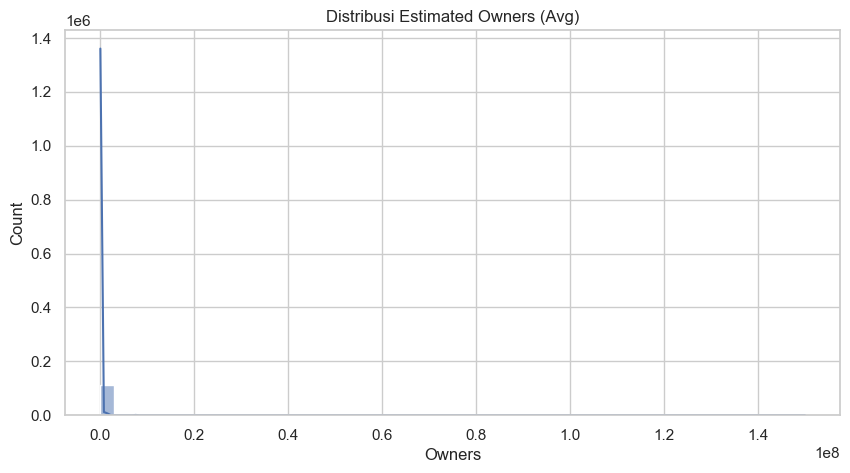

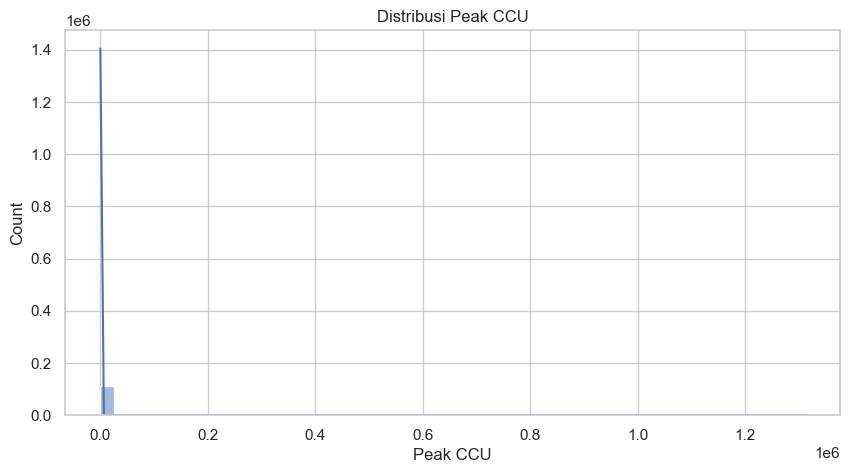

In [73]:
# Visualisasi distribusi
plt.figure(figsize=(10, 5))
sns.histplot(df["EstimatedOwnersAvg"].dropna(), bins=50, kde=True)
plt.title("Distribusi Estimated Owners (Avg)")
plt.xlabel("Owners")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df["Peak CCU"].dropna(), bins=50, kde=True)
plt.title("Distribusi Peak CCU")
plt.xlabel("Peak CCU")
plt.show()

In [74]:
print(df["EstimatedOwnersAvg"].value_counts().sort_index())
print(df["Peak CCU"].value_counts().sort_index())

EstimatedOwnersAvg
0.0            22091
10000.0        70206
35000.0         8277
75000.0         4068
150000.0        2664
               ...  
7500000.0         93
15000000.0        38
35000000.0        21
75000000.0         5
150000000.0        1
Name: count, Length: 14, dtype: int64
Peak CCU
0.0          82955
1.0           8841
2.0           3493
3.0           1964
4.0           1398
             ...  
825215.0         1
872138.0         1
1214621.0        1
1284268.0        1
1311366.0        1
Name: count, Length: 1760, dtype: int64


In [75]:
df["Release date"] = pd.to_datetime(df["Release date"], errors="coerce")
df["release_year"] = df["Release date"].dt.year
print(df["release_year"].value_counts().sort_index())

C:\Users\Yuurei\AppData\Local\Temp\ipykernel_23220\1535267761.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Release date"] = pd.to_datetime(df["Release date"], errors="coerce")


release_year
1997.0        2
1998.0        1
1999.0        3
2000.0        2
2001.0        4
          ...  
2021.0    12376
2022.0    13979
2023.0    15543
2024.0    20583
2025.0     6037
Name: count, Length: 29, dtype: int64


In [76]:
numeric_cols = ["EstimatedOwnersAvg", "Peak CCU", "Price", "Required age", "Average playtime forever", "Median playtime forever"]
for col in numeric_cols:
    print(f"{col} - unique types: {df[col].apply(type).unique()}")
    print(df[col].unique()[:5])  # Lihat sebagian isi kolom

EstimatedOwnersAvg - unique types: [<class 'float'>]
[ 10000.  75000.  35000. 350000. 150000.]
Peak CCU - unique types: [<class 'float'>]
[ 0. 68.  3.  2.  1.]
Price - unique types: [<class 'float'> <class 'str'>]
[19.99 0.99 4.99 5.99 0.0]
Required age - unique types: [<class 'int'> <class 'str'> <class 'float'>]
[0 17 18 10 13]
Average playtime forever - unique types: [<class 'int'> <class 'str'> <class 'float'>]
[0 703 67 224 11]
Median playtime forever - unique types: [<class 'int'> <class 'str'> <class 'float'>]
[0 782 93 257 11]


In [77]:
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Checks

In [78]:
numerical_summary = df.describe()
print(numerical_summary)

                        Release date      Peak CCU   Required age  \
count                         111321  1.114520e+05  111452.000000   
mean   2021-05-10 11:43:03.652680448  1.777215e+02       0.254208   
min              1997-06-30 00:00:00  0.000000e+00       0.000000   
25%              2019-04-30 00:00:00  0.000000e+00       0.000000   
50%              2022-01-17 00:00:00  0.000000e+00       0.000000   
75%              2023-12-03 00:00:00  1.000000e+00       0.000000   
max              2025-05-30 00:00:00  1.311366e+06      21.000000   
std                              NaN  8.390462e+03       2.035653   

               Price  Average playtime forever  Median playtime forever  \
count  111452.000000             111439.000000            111439.000000   
mean        7.061568                 81.256768                72.659805   
min         0.000000                  0.000000                 0.000000   
25%         0.990000                  0.000000                 0.000000   
50%

In [79]:
# Menentukan jumlah top-n yang ingin ditampilkan
n = 10

# Menampilkan top-n value counts untuk kolom 'Genres'
top_genres = df['Genres'].value_counts().head(n)
print("Top {} Genres:".format(n))
print(top_genres)
print("\n" + "="*30 + "\n")

# Menampilkan top-n value counts untuk kolom 'Tags'
top_tags = df['Tags'].value_counts().head(n)
print("Top {} Tags:".format(n))
print(top_tags)
print("\n" + "="*30 + "\n")

# Menampilkan top-n value counts untuk kolom 'Developers'
top_developers = df['Developers'].value_counts().head(n)
print("Top {} Developers:".format(n))
print(top_developers)

Top 10 Genres:
Genres
Casual,Indie              6240
Action,Indie              5172
Action,Adventure,Indie    4578
Adventure,Indie           3897
Adventure,Casual,Indie    3266
Casual                    3190
Indie                     3146
Action,Casual,Indie       3069
Action                    2866
Adventure                 1954
Name: count, dtype: int64


Top 10 Tags:
Tags
Indie,Casual                      302
Action,Indie                      283
Adventure,Casual,Hidden Object    268
Action,Indie,Casual               230
Indie                             126
Casual                            124
Action,Indie,Adventure            105
Action,Adventure,Indie             84
Casual,Indie                       72
Indie,Casual,Puzzle                67
Name: count, dtype: int64


Top 10 Developers:
Developers
EroticGamesClub                     216
Choice of Games                     166
Laush Dmitriy Sergeevich            149
Boogygames Studios                  145
Creobit                 

In [80]:
# Menghitung dan menampilkan jumlah missing values per kolom
missing_values = df.isna().sum()
print("Jumlah Missing Values per Kolom:")
print(missing_values)

Jumlah Missing Values per Kolom:
AppID                     0
Name                     16
Release date            154
Estimated owners         11
Peak CCU                 23
                      ...  
Categories             7591
Genres                 6465
Tags                  37438
EstimatedOwnersAvg       23
release_year            154
Length: 28, dtype: int64


In [81]:
print("\n Data Types:")
print(df.dtypes)


 Data Types:
AppID                         object
Name                          object
Release date          datetime64[ns]
Estimated owners              object
Peak CCU                     float64
                           ...      
Categories                    object
Genres                        object
Tags                          object
EstimatedOwnersAvg           float64
release_year                 float64
Length: 28, dtype: object


In [82]:
# Memeriksa tipe data dari entri pertama di kolom 'Genres'
if not df['Genres'].empty:
    first_genre_type = type(df['Genres'].iloc[0])
    print(f"Tipe data entri pertama di kolom 'Genres': {first_genre_type}")
    if first_genre_type == list:
        print("✅ Kolom 'Genres' tampaknya sudah diparse menjadi list.")
    else:
        print("❌ Kolom 'Genres' belum diparse menjadi list.")
else:
    print("Kolom 'Genres' kosong.")

print("-" * 20)

# Memeriksa tipe data dari entri pertama di kolom 'Tags'
if not df['Tags'].empty:
    first_tag_type = type(df['Tags'].iloc[0])
    print(f"Tipe data entri pertama di kolom 'Tags': {first_tag_type}")
    if first_tag_type == list:
        print("✅ Kolom 'Tags' tampaknya sudah diparse menjadi list.")
    else:
        print("❌ Kolom 'Tags' belum diparse menjadi list.")
else:
    print("Kolom 'Tags' kosong.")

Tipe data entri pertama di kolom 'Genres': <class 'str'>
❌ Kolom 'Genres' belum diparse menjadi list.
--------------------
Tipe data entri pertama di kolom 'Tags': <class 'str'>
❌ Kolom 'Tags' belum diparse menjadi list.


In [83]:
# Memeriksa tipe data kolom 'Release date'
release_date_dtype = df['Release date'].dtype
print(f"Tipe data kolom 'Release date': {release_date_dtype}")

if 'datetime64' in str(release_date_dtype):
    print("✅ Kolom 'Release date' sudah berformat datetime.")
else:
    print("❌ Kolom 'Release date' belum diubah ke format datetime.")

# Memeriksa keberadaan kolom 'release_year'
if 'release_year' in df.columns:
    print("✅ Kolom 'release_year' sudah dibuat.")
    # Opsional: Tampilkan beberapa nilai pertama
    print("Contoh nilai 'release_year':")
    print(df['release_year'].head())
else:
    print("❌ Kolom 'release_year' belum dibuat.")

Tipe data kolom 'Release date': datetime64[ns]
✅ Kolom 'Release date' sudah berformat datetime.
✅ Kolom 'release_year' sudah dibuat.
Contoh nilai 'release_year':
0    2008.0
1    2017.0
2    2021.0
3    2020.0
4    2020.0
Name: release_year, dtype: float64


# Info

In [84]:
df["Release date"] = pd.to_datetime(df["Release date"], errors="coerce")
df["release_year"] = df["Release date"].dt.year
print(df["release_year"].value_counts().sort_index())

release_year
1997.0        2
1998.0        1
1999.0        3
2000.0        2
2001.0        4
          ...  
2021.0    12376
2022.0    13979
2023.0    15543
2024.0    20583
2025.0     6037
Name: count, Length: 29, dtype: int64


In [85]:
print("Top Genres:")
print(df["Genres"].value_counts().head(10))

print("Top Developers:")
print(df["Developers"].value_counts().head(10))

print("Top Tags (before split):")
print(df["Tags"].value_counts().head(10))

Top Genres:
Genres
Casual,Indie              6240
Action,Indie              5172
Action,Adventure,Indie    4578
Adventure,Indie           3897
Adventure,Casual,Indie    3266
Casual                    3190
Indie                     3146
Action,Casual,Indie       3069
Action                    2866
Adventure                 1954
Name: count, dtype: int64
Top Developers:
Developers
EroticGamesClub                     216
Choice of Games                     166
Laush Dmitriy Sergeevich            149
Boogygames Studios                  145
Creobit                             138
Hosted Games                        114
KOEI TECMO GAMES CO., LTD.          108
Sokpop Collective                   105
Atomic Fabrik,Cristian Manolachi     99
Reforged Group                       96
Name: count, dtype: int64
Top Tags (before split):
Tags
Indie,Casual                      302
Action,Indie                      283
Adventure,Casual,Hidden Object    268
Action,Indie,Casual               230
Indie     

In [86]:
df["desc_length"] = df["About the game"].astype(str).apply(len)
print(df["desc_length"].describe())

count    111475.000000
mean       1187.400888
std         980.653816
min           1.000000
25%         590.000000
50%         975.000000
75%        1540.000000
max       32757.000000
Name: desc_length, dtype: float64


In [87]:
from src.preprocessing import preprocess

df_raw = pd.read_csv("../data/games_selected.csv")
df_clean = preprocess(df_raw, use_text_embedding=False)

C:\Users\Yuurei\AppData\Local\Temp\ipykernel_23220\811488887.py:3: DtypeWarning: Columns (0,4,5,6,7,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("../data/games_selected.csv")
d:\Repo\DATATHON\steam_game_popularity_predictor\src\preprocessing.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Release date"] = pd.to_datetime(df["Release date"], errors="coerce")


In [88]:
print(df["Estimated owners"].value_counts())

Estimated owners
0 - 20000                                                                                                                                                                                  70206
0 - 0                                                                                                                                                                                      22091
20000 - 50000                                                                                                                                                                               8277
50000 - 100000                                                                                                                                                                              4068
100000 - 200000                                                                                                                                                                             2664
                  

# After Preprocessing

In [89]:
from src.preprocessing import preprocess
from src.preprocessing import feature_engineering

df_clean = preprocess(df)
X, y = feature_engineering(df_clean)

In [90]:
df_clean

,Peak CCU,Required age,Price,DiscountDLC count,Positive,Negative,Average playtime forever,Median playtime forever,Developers,Publishers,Categories,Genres,Tags,EstimatedOwnersAvg,release_year,desc_length
0,0.0,0.0,19.99,0,6,11,0.0,0.0,Perpetual FX Creative,Perpetual FX Creative,"[Single-player, Multi-player, Steam Achievemen...","[Casual, Indie, Sports]","[Indie, Casual, Sports, Bowling]",10000,2008.0,1043
1,0.0,0.0,0.99,0,53,5,0.0,0.0,Rusty Moyher,Wild Rooster,"[Single-player, Steam Achievements, Full contr...","[Action, Indie]","[Indie, Action, Pixel Graphics, 2D, Retro, Arc...",10000,2017.0,491
2,0.0,0.0,4.99,0,0,0,0.0,0.0,Campião Games,Campião Games,[Single-player],"[Action, Adventure, Indie, Strategy]",[],10000,2021.0,628
3,0.0,0.0,5.99,0,3,0,0.0,0.0,Odd Critter Games,Odd Critter Games,"[Single-player, Full controller support]","[Adventure, Casual, Indie]","[2D Platformer, Atmospheric, Surreal, Mystery,...",10000,2020.0,615
4,0.0,0.0,0.00,0,50,8,0.0,0.0,Unusual Games,Unusual Games,"[Single-player, Steam Achievements]","[Adventure, Indie]","[Indie, Adventure, Nudity, Violent, Sexual Con...",10000,2020.0,672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111470,0.0,0.0,2.99,0,5,0,0.0,0.0,Webcess,Webcess,"[Single-player, Full controller support, Steam...","[Action, Casual, Indie]","[Action Roguelike, Bullet Hell, Hack and Slash...",10000,2025.0,899
111471,0.0,0.0,2.69,0,0,0,0.0,0.0,Hentai Panda,Hentai Panda,"[Single-player, Steam Achievements, Steam Clou...","[Casual, Indie]",[],10000,2025.0,589
111472,0.0,0.0,7.99,0,24,12,0.0,0.0,Sinka Games,"Sinka Games,Arkuda Inc.","[Single-player, Family Sharing]",[Simulation],"[Simulation, Walking Simulator, Idler, First-P...",10000,2025.0,1351
111473,0.0,0.0,0.00,0,0,0,0.0,0.0,AccuBow LLC,AccuBow LLC,"[Single-player, Tracked Controller Support, VR...","[Action, Adventure, Free To Play]",[],0,2025.0,1805


In [91]:
print("Shape of X:", X.shape)

Shape of X: (111321, 539)


In [92]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)  # misalnya 10 baris
display(X.head())  # Jupyter Notebook

,Price,Peak CCU,Required age,Average playtime forever,Median playtime forever,Positive,Negative,release_year,Dev_encoded,Tag_1980s,Tag_1990's,Tag_2.5D,Tag_2D,Tag_2D Fighter,Tag_2D Platformer,Tag_360 Video,Tag_3D,Tag_3D Fighter,Tag_3D Platformer,Tag_3D Vision,Tag_4 Player Local,Tag_4X,Tag_6DOF,Tag_8-bit Music,Tag_ATV,Tag_Abstract,Tag_Action,Tag_Action RPG,Tag_Action RTS,Tag_Action Roguelike,Tag_Action-Adventure,Tag_Addictive,Tag_Adventure,Tag_Agriculture,Tag_Aliens,Tag_Alternate History,Tag_Ambient,Tag_America,Tag_Animation & Modeling,Tag_Anime,Tag_Arcade,Tag_Archery,Tag_Arena Shooter,Tag_Artificial Intelligence,Tag_Assassin,Tag_Asymmetric VR,Tag_Asynchronous Multiplayer,Tag_Atmospheric,Tag_Audio Production,Tag_Auto Battler,Tag_Automation,Tag_Automobile Sim,Tag_BMX,Tag_Base-Building,Tag_Baseball,Tag_Based On A Novel,Tag_Basketball,Tag_Batman,Tag_Battle Royale,Tag_Beat 'em up,Tag_Beautiful,Tag_Benchmark,Tag_Bikes,Tag_Birds,Tag_Blood,Tag_Board Game,Tag_Boomer Shooter,Tag_Boss Rush,Tag_Bowling,Tag_Boxing,Tag_Building,Tag_Bullet Hell,Tag_Bullet Time,Tag_CRPG,Tag_Capitalism,Tag_Card Battler,Tag_Card Game,Tag_Cartoon,Tag_Cartoony,Tag_Casual,Tag_Cats,Tag_Character Action Game,Tag_Character Customization,Tag_Chess,Tag_Choices Matter,Tag_Choose Your Own Adventure,Tag_Cinematic,Tag_City Builder,Tag_Class-Based,Tag_Classic,Tag_Clicker,Tag_Co-op,Tag_Co-op Campaign,Tag_Coding,Tag_Cold War,Tag_Collectathon,Tag_Colony Sim,Tag_Colorful,Tag_Combat,Tag_Combat Racing,Tag_Comedy,Tag_Comic Book,Tag_Competitive,Tag_Conspiracy,Tag_Controller,Tag_Conversation,Tag_Cooking,Tag_Cozy,Tag_Crafting,Tag_Creature Collector,Tag_Cricket,Tag_Crime,Tag_Crowdfunded,Tag_Cult Classic,Tag_Cute,Tag_Cyberpunk,Tag_Cycling,Tag_Dark,Tag_Dark Comedy,Tag_Dark Fantasy,Tag_Dark Humor,Tag_Dating Sim,Tag_Deckbuilding,Tag_Demons,Tag_Design & Illustration,Tag_Destruction,Tag_Detective,Tag_Dice,Tag_Difficult,Tag_Dinosaurs,Tag_Diplomacy,Tag_Documentary,Tag_Dog,Tag_Dragons,Tag_Drama,Tag_Driving,Tag_Dungeon Crawler,Tag_Dungeons & Dragons,Tag_Dwarf,Tag_Dynamic Narration,Tag_Dystopian,Tag_Early Access,Tag_Economy,Tag_Education,Tag_Electronic,Tag_Electronic Music,Tag_Elf,Tag_Emotional,Tag_Epic,Tag_Episodic,Tag_Escape Room,Tag_Experience,Tag_Experimental,Tag_Exploration,Tag_Extraction Shooter,Tag_FMV,Tag_FPS,Tag_Faith,Tag_Family Friendly,Tag_Fantasy,Tag_Farming,Tag_Farming Sim,Tag_Fast-Paced,Tag_Feature Film,Tag_Female Protagonist,Tag_Fighting,Tag_First-Person,Tag_Fishing,Tag_Flight,Tag_Football,Tag_Football (American),Tag_Football (Soccer),Tag_Foreign,Tag_Fox,Tag_Free to Play,Tag_Funny,Tag_Futuristic,Tag_Gambling,Tag_Game Development,Tag_GameMaker,Tag_Games Workshop,Tag_Gaming,Tag_God Game,Tag_Golf,Tag_Gore,Tag_Gothic,Tag_Grand Strategy,Tag_Great Soundtrack,Tag_Grid-Based Movement,Tag_Gun Customization,Tag_Hack and Slash,Tag_Hacking,Tag_Hand-drawn,Tag_Hardware,Tag_Heist,Tag_Hentai,Tag_Hero Shooter,Tag_Hex Grid,Tag_Hidden Object,Tag_Historical,Tag_Hobby Sim,Tag_Hockey,Tag_Horror,Tag_Horses,Tag_Hunting,Tag_Idler,Tag_Illuminati,Tag_Immersive,Tag_Immersive Sim,Tag_Indie,Tag_Instrumental Music,Tag_Intentionally Awkward Controls,Tag_Interactive Fiction,Tag_Inventory Management,Tag_Investigation,Tag_Isometric,Tag_JRPG,Tag_Jet,Tag_Job Simulator,Tag_Jump Scare,Tag_Kickstarter,Tag_LEGO,Tag_LGBTQ+,Tag_Lara Croft,Tag_Lemmings,Tag_Level Editor,Tag_Life Sim,Tag_Linear,Tag_Local Co-Op,Tag_Local Multiplayer,Tag_Logic,Tag_Loot,Tag_Looter Shooter,Tag_Lore-Rich,Tag_Lovecraftian,Tag_MMORPG,Tag_MOBA,Tag_Magic,Tag_Mahjong,Tag_Management,Tag_Mars,Tag_Martial Arts,Tag_Massively Multiplayer,Tag_Masterpiece,Tag_Match 3,Tag_Mature,Tag_Mechs,Tag_Medical Sim,Tag_Medieval,Tag_Memes,Tag_Metroidvania,Tag_Military,Tag_Mini Golf,Tag_Minigames,Tag_Minimalist,Tag_Mining,Tag_Mod,Tag_Moddable,Tag_Modern,Tag_Motocross,Tag_Motorbike,Tag_Mouse only,Tag_Movie,Tag_Multiplayer,Tag_Multiple Endings,Tag_Music,Tag_Music-Based Procedural Generation,Tag_Musou,Tag_Mystery,Tag_Mystery Dungeon,Tag_Mythology,Tag_NSFW,Tag_Narration,Tag_Nar

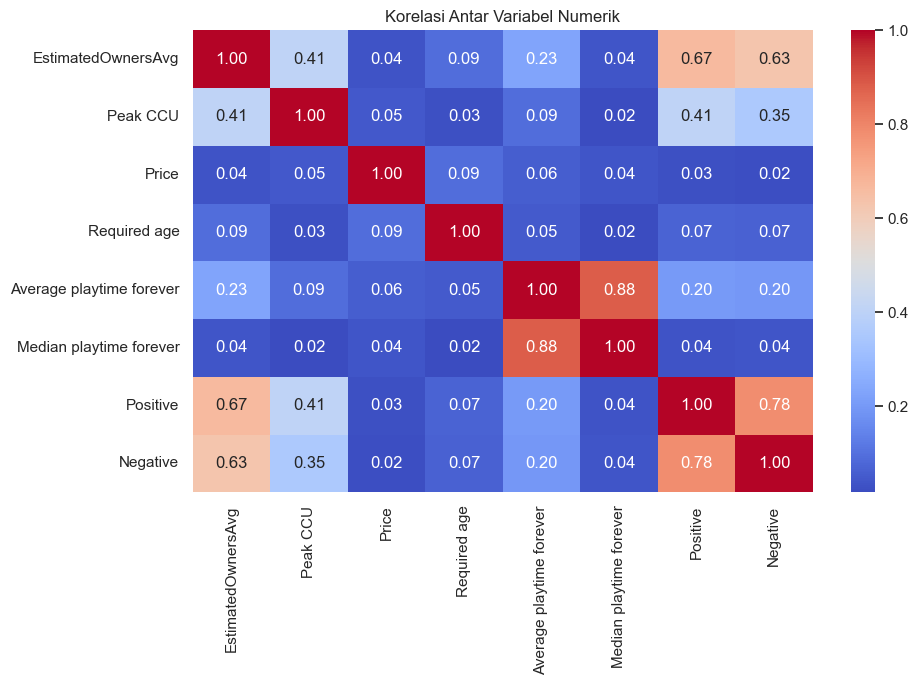

In [93]:
numeric_cols = ["EstimatedOwnersAvg", "Peak CCU", "Price", "Required age", "Average playtime forever", "Median playtime forever", "Positive", "Negative"]
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Variabel Numerik")
plt.show()

In [94]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)  # misalnya 10 baris
display(X.head())  # Jupyter Notebook

,Price,Peak CCU,Required age,Average playtime forever,Median playtime forever,Positive,Negative,release_year,Dev_encoded,Tag_1980s,Tag_1990's,Tag_2.5D,Tag_2D,Tag_2D Fighter,Tag_2D Platformer,Tag_360 Video,Tag_3D,Tag_3D Fighter,Tag_3D Platformer,Tag_3D Vision,Tag_4 Player Local,Tag_4X,Tag_6DOF,Tag_8-bit Music,Tag_ATV,Tag_Abstract,Tag_Action,Tag_Action RPG,Tag_Action RTS,Tag_Action Roguelike,Tag_Action-Adventure,Tag_Addictive,Tag_Adventure,Tag_Agriculture,Tag_Aliens,Tag_Alternate History,Tag_Ambient,Tag_America,Tag_Animation & Modeling,Tag_Anime,Tag_Arcade,Tag_Archery,Tag_Arena Shooter,Tag_Artificial Intelligence,Tag_Assassin,Tag_Asymmetric VR,Tag_Asynchronous Multiplayer,Tag_Atmospheric,Tag_Audio Production,Tag_Auto Battler,Tag_Automation,Tag_Automobile Sim,Tag_BMX,Tag_Base-Building,Tag_Baseball,Tag_Based On A Novel,Tag_Basketball,Tag_Batman,Tag_Battle Royale,Tag_Beat 'em up,Tag_Beautiful,Tag_Benchmark,Tag_Bikes,Tag_Birds,Tag_Blood,Tag_Board Game,Tag_Boomer Shooter,Tag_Boss Rush,Tag_Bowling,Tag_Boxing,Tag_Building,Tag_Bullet Hell,Tag_Bullet Time,Tag_CRPG,Tag_Capitalism,Tag_Card Battler,Tag_Card Game,Tag_Cartoon,Tag_Cartoony,Tag_Casual,Tag_Cats,Tag_Character Action Game,Tag_Character Customization,Tag_Chess,Tag_Choices Matter,Tag_Choose Your Own Adventure,Tag_Cinematic,Tag_City Builder,Tag_Class-Based,Tag_Classic,Tag_Clicker,Tag_Co-op,Tag_Co-op Campaign,Tag_Coding,Tag_Cold War,Tag_Collectathon,Tag_Colony Sim,Tag_Colorful,Tag_Combat,Tag_Combat Racing,Tag_Comedy,Tag_Comic Book,Tag_Competitive,Tag_Conspiracy,Tag_Controller,Tag_Conversation,Tag_Cooking,Tag_Cozy,Tag_Crafting,Tag_Creature Collector,Tag_Cricket,Tag_Crime,Tag_Crowdfunded,Tag_Cult Classic,Tag_Cute,Tag_Cyberpunk,Tag_Cycling,Tag_Dark,Tag_Dark Comedy,Tag_Dark Fantasy,Tag_Dark Humor,Tag_Dating Sim,Tag_Deckbuilding,Tag_Demons,Tag_Design & Illustration,Tag_Destruction,Tag_Detective,Tag_Dice,Tag_Difficult,Tag_Dinosaurs,Tag_Diplomacy,Tag_Documentary,Tag_Dog,Tag_Dragons,Tag_Drama,Tag_Driving,Tag_Dungeon Crawler,Tag_Dungeons & Dragons,Tag_Dwarf,Tag_Dynamic Narration,Tag_Dystopian,Tag_Early Access,Tag_Economy,Tag_Education,Tag_Electronic,Tag_Electronic Music,Tag_Elf,Tag_Emotional,Tag_Epic,Tag_Episodic,Tag_Escape Room,Tag_Experience,Tag_Experimental,Tag_Exploration,Tag_Extraction Shooter,Tag_FMV,Tag_FPS,Tag_Faith,Tag_Family Friendly,Tag_Fantasy,Tag_Farming,Tag_Farming Sim,Tag_Fast-Paced,Tag_Feature Film,Tag_Female Protagonist,Tag_Fighting,Tag_First-Person,Tag_Fishing,Tag_Flight,Tag_Football,Tag_Football (American),Tag_Football (Soccer),Tag_Foreign,Tag_Fox,Tag_Free to Play,Tag_Funny,Tag_Futuristic,Tag_Gambling,Tag_Game Development,Tag_GameMaker,Tag_Games Workshop,Tag_Gaming,Tag_God Game,Tag_Golf,Tag_Gore,Tag_Gothic,Tag_Grand Strategy,Tag_Great Soundtrack,Tag_Grid-Based Movement,Tag_Gun Customization,Tag_Hack and Slash,Tag_Hacking,Tag_Hand-drawn,Tag_Hardware,Tag_Heist,Tag_Hentai,Tag_Hero Shooter,Tag_Hex Grid,Tag_Hidden Object,Tag_Historical,Tag_Hobby Sim,Tag_Hockey,Tag_Horror,Tag_Horses,Tag_Hunting,Tag_Idler,Tag_Illuminati,Tag_Immersive,Tag_Immersive Sim,Tag_Indie,Tag_Instrumental Music,Tag_Intentionally Awkward Controls,Tag_Interactive Fiction,Tag_Inventory Management,Tag_Investigation,Tag_Isometric,Tag_JRPG,Tag_Jet,Tag_Job Simulator,Tag_Jump Scare,Tag_Kickstarter,Tag_LEGO,Tag_LGBTQ+,Tag_Lara Croft,Tag_Lemmings,Tag_Level Editor,Tag_Life Sim,Tag_Linear,Tag_Local Co-Op,Tag_Local Multiplayer,Tag_Logic,Tag_Loot,Tag_Looter Shooter,Tag_Lore-Rich,Tag_Lovecraftian,Tag_MMORPG,Tag_MOBA,Tag_Magic,Tag_Mahjong,Tag_Management,Tag_Mars,Tag_Martial Arts,Tag_Massively Multiplayer,Tag_Masterpiece,Tag_Match 3,Tag_Mature,Tag_Mechs,Tag_Medical Sim,Tag_Medieval,Tag_Memes,Tag_Metroidvania,Tag_Military,Tag_Mini Golf,Tag_Minigames,Tag_Minimalist,Tag_Mining,Tag_Mod,Tag_Moddable,Tag_Modern,Tag_Motocross,Tag_Motorbike,Tag_Mouse only,Tag_Movie,Tag_Multiplayer,Tag_Multiple Endings,Tag_Music,Tag_Music-Based Procedural Generation,Tag_Musou,Tag_Mystery,Tag_Mystery Dungeon,Tag_Mythology,Tag_NSFW,Tag_Narration,Tag_Nar

In [95]:
embed_cols = [col for col in X.columns if col.startswith("About_emb_")]
X_embed = X[embed_cols]

print("Jumlah kolom embedding:", len(embed_cols))
print("Contoh kolom:", embed_cols[:5])

Jumlah kolom embedding: 0
Contoh kolom: []


In [96]:
from sklearn.decomposition import PCA
if embed_cols == 0:
    # reduksi dimensi ke 2D
    pca = PCA(n_components=2)
    embed_2d = pca.fit_transform(X_embed)

    plt.scatter(embed_2d[:, 0], embed_2d[:, 1], c=y, cmap="viridis", s=1)
    plt.title("Visualisasi About the Game Embedding")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.colorbar(label="EstimatedOwnersAvg")
    plt.show()
else :
    print("Tidak ada kolom embedding yang ditemukan.")
    print("Pastikan preprocessing dilakukan dengan menggunakan embedding.")

Tidak ada kolom embedding yang ditemukan.
Pastikan preprocessing dilakukan dengan menggunakan embedding.


In [97]:
df["Tags"].head()

0                          Indie,Casual,Sports,Bowling
1    Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...
2                                                  NaN
3    2D Platformer,Atmospheric,Surreal,Mystery,Puzz...
4    Indie,Adventure,Nudity,Violent,Sexual Content,...
Name: Tags, dtype: object

In [98]:
print([col for col in X.columns if col.startswith("Tag_")])

['Tag_1980s', "Tag_1990's", 'Tag_2.5D', 'Tag_2D', 'Tag_2D Fighter', 'Tag_2D Platformer', 'Tag_360 Video', 'Tag_3D', 'Tag_3D Fighter', 'Tag_3D Platformer', 'Tag_3D Vision', 'Tag_4 Player Local', 'Tag_4X', 'Tag_6DOF', 'Tag_8-bit Music', 'Tag_ATV', 'Tag_Abstract', 'Tag_Action', 'Tag_Action RPG', 'Tag_Action RTS', 'Tag_Action Roguelike', 'Tag_Action-Adventure', 'Tag_Addictive', 'Tag_Adventure', 'Tag_Agriculture', 'Tag_Aliens', 'Tag_Alternate History', 'Tag_Ambient', 'Tag_America', 'Tag_Animation & Modeling', 'Tag_Anime', 'Tag_Arcade', 'Tag_Archery', 'Tag_Arena Shooter', 'Tag_Artificial Intelligence', 'Tag_Assassin', 'Tag_Asymmetric VR', 'Tag_Asynchronous Multiplayer', 'Tag_Atmospheric', 'Tag_Audio Production', 'Tag_Auto Battler', 'Tag_Automation', 'Tag_Automobile Sim', 'Tag_BMX', 'Tag_Base-Building', 'Tag_Baseball', 'Tag_Based On A Novel', 'Tag_Basketball', 'Tag_Batman', 'Tag_Battle Royale', "Tag_Beat 'em up", 'Tag_Beautiful', 'Tag_Benchmark', 'Tag_Bikes', 'Tag_Birds', 'Tag_Blood', 'Tag_Bo

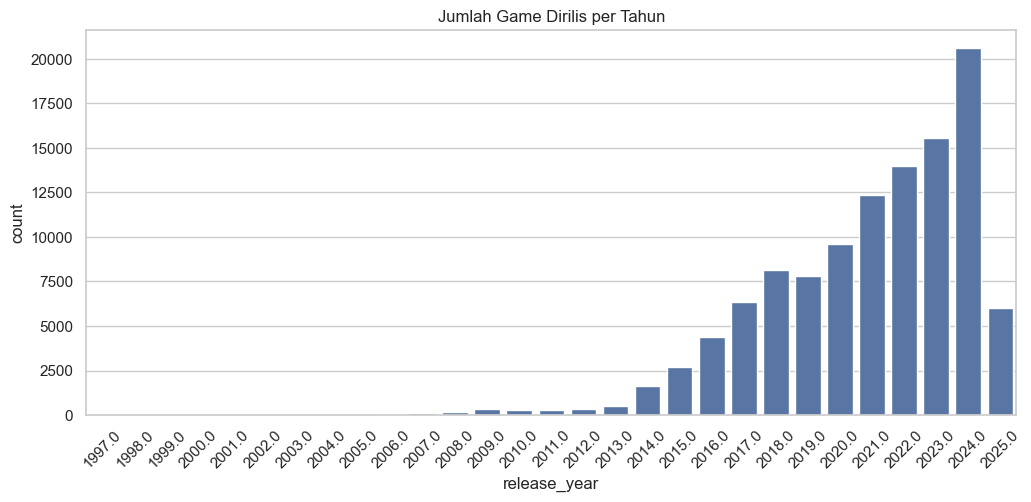

In [99]:
plt.figure(figsize=(12, 5))
sns.countplot(x="release_year", data=df_clean, order=sorted(df_clean["release_year"].dropna().unique()))
plt.title("Jumlah Game Dirilis per Tahun")
plt.xticks(rotation=45)
plt.show()

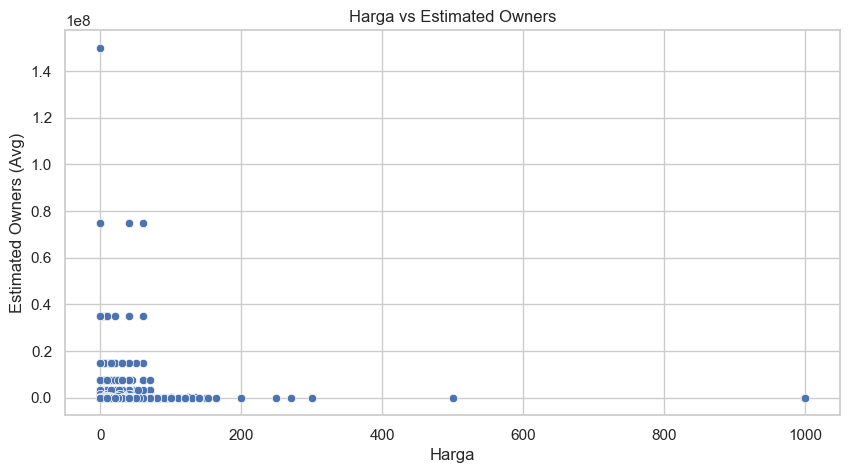

In [100]:
# Harga vs Popularitas
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Price", y="EstimatedOwnersAvg", data=df_clean)
plt.title("Harga vs Estimated Owners")
plt.xlabel("Harga")
plt.ylabel("Estimated Owners (Avg)")
plt.show()

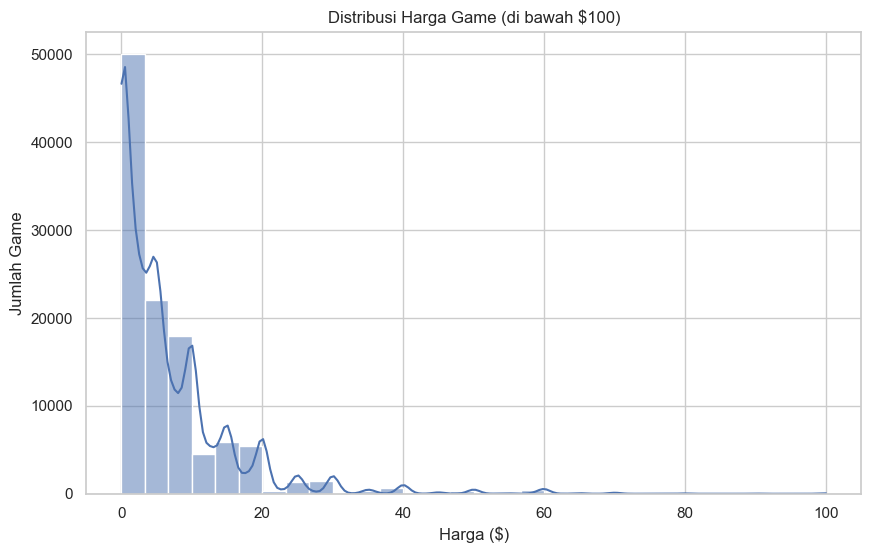

In [101]:
# Membuat histogram untuk harga (misalnya, di bawah $100)
plt.figure(figsize=(10, 6))
sns.histplot(df_clean[df_clean['Price'] < 100]['Price'], bins=30, kde=True)
plt.title('Distribusi Harga Game (di bawah $100)')
plt.xlabel('Harga ($)')
plt.ylabel('Jumlah Game')
plt.show()

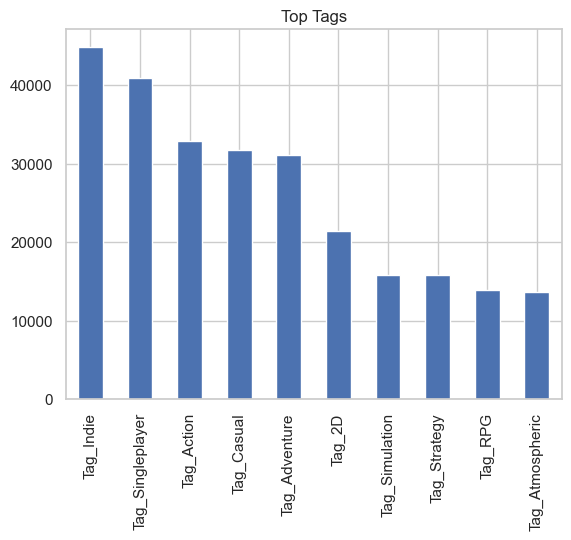

In [102]:
top_tags = X.filter(like="Tag_").sum().sort_values(ascending=False).head(10)
if not top_tags.empty:
    top_tags.plot(kind="bar", title="Top Tags")
    plt.show()
else:
    print("Tidak ada kolom Tag_ ditemukan dalam X.")

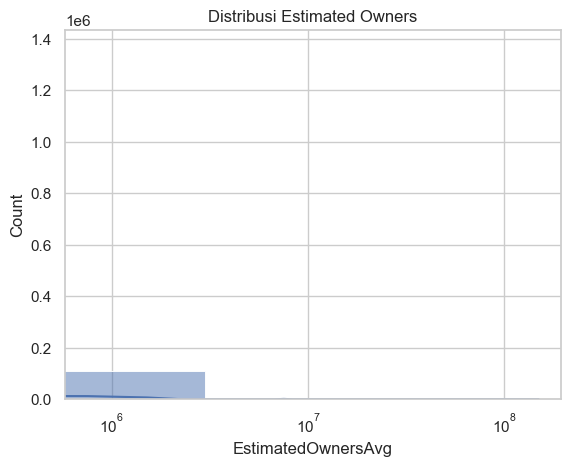

In [103]:
sns.histplot(df_clean["EstimatedOwnersAvg"], bins=50, kde=True)
plt.xscale("log")
plt.title("Distribusi Estimated Owners")
plt.show()

In [104]:
print(df["EstimatedOwnersAvg"].describe())

count    1.114520e+05
mean     6.864215e+04
std      9.270899e+05
min      0.000000e+00
25%      1.000000e+04
50%      1.000000e+04
75%      1.000000e+04
max      1.500000e+08
Name: EstimatedOwnersAvg, dtype: float64
